## [Phase space](https://en.wikipedia.org/wiki/Phase_space) view of simple 2-compartment model (Supplemental)

Short story: the system is a [line attractor](http://www.scholarpedia.org/article/Attractor_network#Line.2C_ring.2C_and_plane_attractors) (black line in plot below). Along the line, the steady state condition outlined in the paper holds:

$$
\frac{u_p}{u_c} = \frac{b}{a} 
$$

In 2 dimensions, this means the slope of the line is $b/a$. The parallel blue lines show trajectories of the model; everything converges to the line attractor. The slope of the blue lines is $-1$, reflecting conservation of mass.

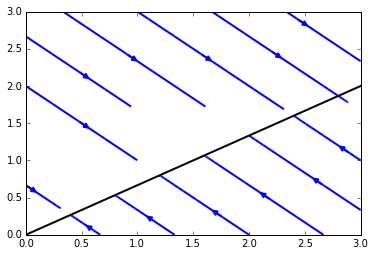

In [1]:
from __future__ import division
import numpy as np
import pylab as plt
from scipy.linalg import expm,eig
%matplotlib inline

a = 1.0
b = 1.5

## Streamplot to check answer
U2, U1 = np.mgrid[0:3:10j, 0:3:10j]
U1dot = -a*U1 + b*U2
U2dot =  a*U1 - b*U2
speed = np.sqrt(U1dot*U1dot + U2dot*U2dot)

plt.streamplot(U1, U2, U1dot, U2dot,linewidth=2,density=0.2)
xx = np.linspace(0,3)
plt.plot(xx,xx*a/b,'-k',lw=2)
plt.xlim([0,3])
plt.ylim([0,3])

#plt.savefig('2d_line_attractor.svg')
plt.show()

## Phase space plots for a 3-compartment system

The system is constrained to a 2-dimensional plane: essentially, a [simplex](https://en.wikipedia.org/wiki/Simplex#Probability), where the sum of cargo across all compartments is fixed (corresponding to conservation of mass).

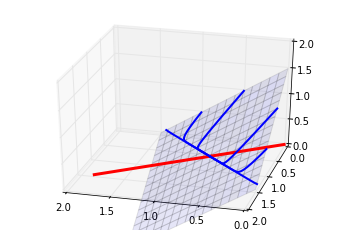

In [7]:
## 3D bottleneck model
g = 1.0
e = 0.1
A = np.array([[-e,      g,      0],
              [+e ,  -2*g,     +e],
              [  0,     g,     -e]])

## Initial conditions to try
u0s = np.array([[1.425,0.075,0],[0,0.075,1.425],[0,0.5,1],[1,0.5,0],[0,1,0.5],[0.5,1,0]])

## State-transition matrix
dt = 0.1
du = expm(A*dt)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot transparent plane
xx = np.arange(0,1.5,0.01)
yy = np.arange(0,1.5,0.01)
xx,yy = np.meshgrid(xx,yy)
zz = 1.5 - xx - yy
ax.plot_surface(xx,yy,zz,alpha=0.1)

# Plot nullspace of A as a red line
w,v = eig(A)
v0 = np.vstack(([0,0,0],2.5*v[:,np.argmin(abs(w))]))
ax.plot(v0[:,0],v0[:,2],v0[:,1],'-r',lw=3)

# Plot trajectories
for u0 in u0s:
    t = 0
    u = [u0]
    while t < 1000:
        u.append(np.dot(du,u[-1]))
        t += dt
    u = np.array(u)
    ax.plot(u[:,0],u[:,2],u[:,1],'-b',lw=2)

ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.set_zlim([0,2])

ax.view_init(azim=105)

#plt.savefig('3d_bottleneck_attractor.svg')
plt.show()
    

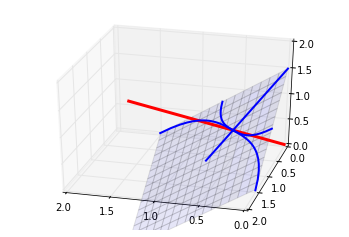

In [3]:
## 3D uniform model
g = 1.0
e = 1.0
A = np.array([[-e,      g,      0],
              [+e ,  -2*g,     +e],
              [  0,     g,     -e]])

## Initial conditions to try
u0s = np.array([[1.5,0,0],[0,1.5,0],[0,0,1.5],[0.75,0.75,0],[0,0.75,0.75],[0.75,0,0.75]])

## State-transition matrix
dt = 0.1
du = expm(A*dt)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot transparent plane
xx = np.arange(0,1.5,0.01)
yy = np.arange(0,1.5,0.01)
xx,yy = np.meshgrid(xx,yy)
zz = 1.5 - xx - yy
ax.plot_surface(xx,yy,zz,alpha=0.1)

# Plot nullspace of A as a red line
w,v = eig(A)
v0 = np.vstack(([0,0,0],2.5*v[:,np.argmin(abs(w))]))
ax.plot(v0[:,0],v0[:,2],v0[:,1],'-r',lw=3)

# Plot trajectories
for u0 in u0s:
    t = 0
    u = [u0]
    while t < 10:
        u.append(np.dot(du,u[-1]))
        t += dt
    u = np.array(u)
    ax.plot(u[:,0],u[:,2],u[:,1],'-b',lw=2)

ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.set_zlim([0,2])

ax.view_init(azim=105)

#plt.savefig('3d_uniform_attractor.svg')
plt.show()
    